# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
    * transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# 1. Import Libraries and Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 2. Individual Dataset Examination

## 2.1 Profile Dataset

In [2]:
# Basic statistics for profile dataset
print(profile.describe())
profile

                age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


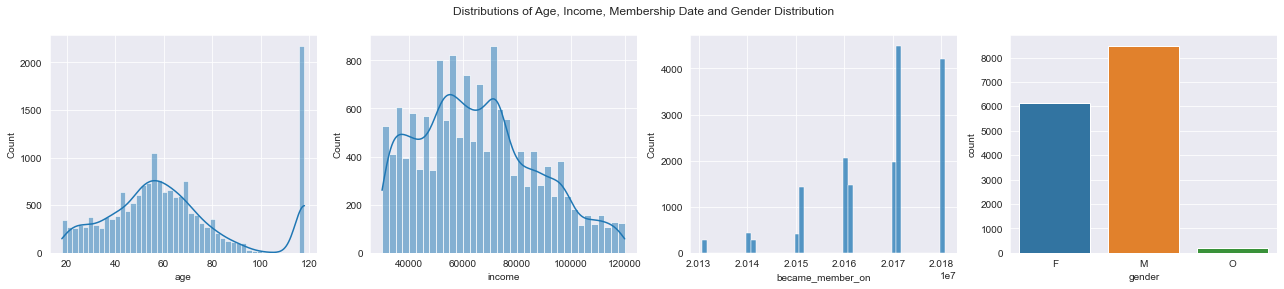

In [3]:
# Visualization of the distribution of age, income, and membership duration
fig, axs = plt.subplots(1, 4, figsize=(22, 4))
sns.histplot(profile['age'], kde=True, ax=axs[0])
sns.histplot(profile['income'], kde=True, ax=axs[1])
sns.histplot(profile['became_member_on'], kde=False, bins=50, ax=axs[2])
sns.countplot(x='gender', data=profile, ax=axs[3])
fig.suptitle('Distributions of Age, Income, Membership Date and Gender Distribution')
plt.show()

### 2.1.1 Feature cleaning

In [4]:
# For age 118 seems to be the same as missing
print(profile['age'].value_counts())
profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)

# Since age, income and gender are our main predictors and when one is missing all of them are missing, we will remove them (account for 11%).
print(profile[['age', 'income', 'gender']].isna().value_counts())

# Handle missing values
profile.dropna(subset=['age', 'income', 'gender'], inplace=True)

118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64
age    income  gender
False  False   False     14825
True   True    True       2175
dtype: int64


## 2.2 Portfolio Dataset
This is our second dataset to be used as input. It contains the offers available and the features of each offer.

In [5]:
# Basic statistics for portfolio dataset
print(portfolio.describe())
portfolio

          reward  difficulty   duration
count  10.000000   10.000000  10.000000
mean    4.200000    7.700000   6.500000
std     3.583915    5.831905   2.321398
min     0.000000    0.000000   3.000000
25%     2.000000    5.000000   5.000000
50%     4.000000    8.500000   7.000000
75%     5.000000   10.000000   7.000000
max    10.000000   20.000000  10.000000


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


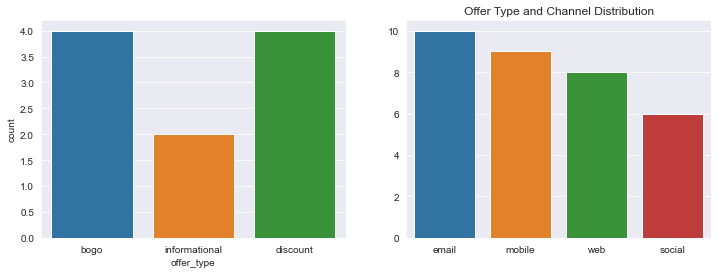

In [6]:
# Visualization of offer type distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='offer_type', data=portfolio, ax=axs[0])
channels_dist = portfolio['channels'].explode().value_counts()
sns.barplot(x=channels_dist.index, y=channels_dist.values)
plt.title('Offer Type and Channel Distribution')
plt.show()

In [7]:
# Transform channel column into several boolean columns
channels_dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack()).sum(level=0)

# Concatenate the new columns with the original DataFrame
portfolio = pd.concat([portfolio.drop(columns='channels'), channels_dummies], axis=1)
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


## 2.3 Transcript Dataset
This is our 'target' data, what happened for a certain person and offer id.

From this we could for instance predict: sum volume customer will do after receving the order (without viewing it), or after viewing the order. Or simplify as if they saw it.

Note: I can't use transactions of other offers for the customer since I don't know the timestamps of it, but that would probably have high predictive power.

In [8]:
# Basic statistics for transcript dataset
print(transcript.describe())

# Process data
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer id') if 'offer id' in x else x.get('offer_id'))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount'))
transcript['offer_reward'] = transcript['value'].apply(lambda x: x.get('reward'))
transcript.drop(columns='value', inplace=True)

transcript

                time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000


,person,event,time,offer_id,amount,offer_reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,None,1.59,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,None,9.53,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,None,3.61,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,None,3.53,NaN


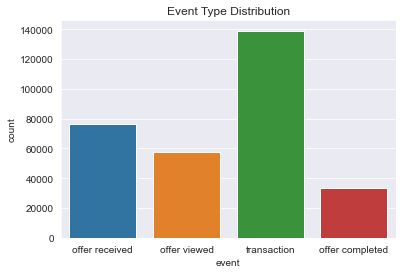

In [9]:
# Visualization of event type distribution
sns.countplot(x='event', data=transcript)
plt.title('Event Type Distribution')
plt.show()

# 5. Feature Engineering

### 5.1 Input engineering

In [10]:
# Replace datetime column by days since it would be easier to understand for the model
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
maximum_became_member_on = profile['became_member_on'].max()

profile['membership_days'] = (maximum_became_member_on - profile['became_member_on']).dt.days
profile.drop(columns=['became_member_on'])

# One-hot encode categorical variables
profile = pd.concat([profile.drop(columns='gender'), pd.get_dummies(profile[['gender']])], axis=1)
profile

,age,id,became_member_on,income,membership_days,gender_F,gender_M,gender_O
1,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,376,1,0,0
3,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,443,1,0,0
5,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,91,0,1,0
8,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,167,0,1,0
12,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,257,0,1,0
...,...,...,...,...,...,...,...,...
16995,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,52,1,0,0
16996,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,13,0,1,0
16997,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,546,0,1,0
16998,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,871,1,0,0


In [11]:
# Calculate the mean and standard deviation of income and amounts per user, based on their gender and age groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
profile['age_group'] = pd.cut(profile['age'], bins=age_bins, labels=age_labels)
profile

,age,id,became_member_on,income,membership_days,gender_F,gender_M,gender_O,age_group
1,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,376,1,0,0,45-54
3,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,443,1,0,0,65+
5,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,91,0,1,0,65+
8,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,167,0,1,0,55-64
12,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,257,0,1,0,55-64
...,...,...,...,...,...,...,...,...,...
16995,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,52,1,0,0,35-44
16996,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,13,0,1,0,55-64
16997,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,546,0,1,0,45-54
16998,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,871,1,0,0,65+


### 5.2 Target definition

We will calculate three types of variables to experiment with:
- Probability of viewing an offer: This would help us understand if customers are more likely to even view the offers sent to them.
- Probability of completing an offer, given it was viewed: By considering only those cases where the customer has viewed the offer, we can remove the noise caused by unviewed offers. This will help us analyze how effective offers are, conditional on them being seen.
- Total transaction amount after viewing an offer: This target variable would help us understand the effectiveness of offers in terms of driving customer spending.


In [146]:
# Check if a customer can receive an order several times
transcript[transcript['event'] == 'offer received'].groupby(by=['person', 'offer_id', 'event']).count().sort_values(by='time')

time  \
person                           offer_id                         event                  
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 offer received     1   
a09a2e837d2545999220c592b6c05956 4d5c57ea9a6940dd891ad53e9dbe8da0 offer received     1   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 offer received     1   
a09c68b1798542a6ae9277046de72dc3 2906b810c7d4411798c6938adc9daaa5 offer received     1   
                                 5a8bc65990b245e5a138643cd4eb9837 offer received     1   
...                                                                                ...   
2ea50de315514ccaa5079db4c1ecbc0b fafdcd668e3743c1bb461111dcafc2a4 offer received     5   
eece6a9a7bdd4ea1b0f812f34fc619d6 5a8bc65990b245e5a138643cd4eb9837 offer received     5   
6d2db3aad94648259e539920fc2cf2a6 f19421c1d4aa40978ebb69ca19b0e20d offer received     5   
43a50d7e5c8547a9aa1ec31291b9fc30 0b1e1539f2cc45b7b9fa7c272da2e1d7 offer received     5   
23d67a23296a485781e69c109a10a1cf 5a8bc65990b245e5a138643cd4eb9837 offer received     5   

                                                                                  amount  \
person                           offer_id                         event                    
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 offer received       0   
a09a2e837d2545999220c592b6c05956 4d5c57ea9a6940dd891ad53e9dbe8da0 offer received       0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 offer received       0   
a09c68b1798542a6ae9277046de72dc3 2906b810c7d4411798c6938adc9daaa5 offer received       0   
                                 5a8bc65990b245e5a138643cd4eb9837 offer received       0   
...                                                                                  ...   
2ea50de315514ccaa5079db4c1ecbc0b fafdcd668e3743c1bb461111dcafc2a4 offer received       0   
eece6a9a7bdd4ea1b0f812f34fc619d6 5a8bc65990b245e5a138643cd4eb9837 offer received       0   
6d2db3aad94648259e539920fc2cf2a6 f19421c1d4aa40978ebb69ca19b0e20d offer received       0   
43a50d7e5c8547a9aa1ec31291b9fc30 0b1e1539f2cc45b7b9fa7c272da2e1d7 offer received       0   
23d67a23296a485781e69c109a10a1cf 5a8bc65990b245e5a138643cd4eb9837 offer received       0   

                                                                                  offer_reward  
person                           offer_id                         event                         
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 offer received             0  
a09a2e837d2545999220c592b6c05956 4d5c57ea9a6940dd891ad53e9dbe8da0 offer received             0  
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 offer received             0  
a09c68b1798542a6ae9277046de72dc3 2906b810c7d4411798c6938adc9daaa5 offer received             0  
                                 5a8bc65990b245e5a138643cd4eb9837 offer received             0  
...                                                                                        ...  
2ea50de315514ccaa5079db4c1ecbc0b fafdcd668e3743c1bb461111dcafc2a4 offer received             0  
eece6a9a7bdd4ea1b0f812f34fc619d6 5a8bc65990b245e5a138643cd4eb9837 offer received             0  
6d2db3aad94648259e539920fc2cf2a6 f19421c1d4aa40978ebb69ca19b0e20d offer received             0  
43a50d7e5c8547a9aa1ec31291b9fc30 0b1e1539f2cc45b7b9fa7c272da2e1d7 offer received             0  
23d67a23296a485781e69c109a10a1cf 5a8bc65990b245e5a138643cd4eb9837 offer received             0  

[63288 rows x 3 columns]

In [153]:
# There are some cases where customer received an offer several times
transcript[(transcript['person'] == '23d67a23296a485781e69c109a10a1cf') & (transcript['offer_id'] == '5a8bc65990b245e5a138643cd4eb9837')]

,person,event,time,offer_id,amount,offer_reward
8609,23d67a23296a485781e69c109a10a1cf,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
39104,23d67a23296a485781e69c109a10a1cf,offer viewed,84,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
60834,23d67a23296a485781e69c109a10a1cf,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
71242,23d67a23296a485781e69c109a10a1cf,offer viewed,174,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
119448,23d67a23296a485781e69c109a10a1cf,offer received,336,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
140903,23d67a23296a485781e69c109a10a1cf,offer viewed,372,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
209204,23d67a23296a485781e69c109a10a1cf,offer received,504,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
217166,23d67a23296a485781e69c109a10a1cf,offer viewed,504,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
252752,23d67a23296a485781e69c109a10a1cf,offer received,576,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
264523,23d67a23296a485781e69c109a10a1cf,offer viewed,582,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN


In [19]:
# Let's measure the times this happens => A high frequency 17% It is probably because it was received by different channels but there is no way of finding out...
# We will just take the min of time and max of amount and offer_reward
# Group by 'person', 'offer_id', and 'event', and aggregate 'time', 'amount', and 'reward'
deduplicated_transcript = transcript.groupby(['person', 'offer_id', 'event']).agg({'time': 'min', 'amount': 'max', 'offer_reward': 'max'}).reset_index()

# Examine the deduplicated Transcript dataset
print(deduplicated_transcript.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141419 entries, 0 to 141418
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   person        141419 non-null  object 
 1   offer_id      141419 non-null  object 
 2   event         141419 non-null  object 
 3   time          141419 non-null  int64  
 4   amount        0 non-null       float64
 5   offer_reward  28996 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.5+ MB
None


In [41]:
# Create the merged_events dataset
viewed_events = deduplicated_transcript[deduplicated_transcript['event'] == 'offer viewed'][['person', 'offer_id', 'time']]
completed_events = deduplicated_transcript[deduplicated_transcript['event'] == 'offer completed'][['person', 'offer_id', 'time']]
merged_events = viewed_events.merge(completed_events, on=['person', 'offer_id'], suffixes=('_view', '_comp'), how='outer')
merged_events['offer_viewed'] = merged_events['time_view'].notnull()
merged_events['offer_completed_after_view'] = (merged_events['time_comp'] > merged_events['time_view']) & (merged_events['time_comp'].notnull()) & (merged_events['time_view'].notnull())
merged_events = merged_events.drop(columns=['time_view', 'time_comp'])

# Merge profile left join with merged_events
profile_merged_events = profile.merge(merged_events, left_on='id', right_on='person', how='left').drop(columns=['id'])

# Merge the profile_merged_events with portfolio
merged_data = profile_merged_events.merge(portfolio, left_on='offer_id', right_on='id', how='left').drop(columns=['id'])

# Examine the final DataFrame
display(merged_data.head())

,age,became_member_on,income,membership_days,gender_F,gender_M,gender_O,age_group,person,offer_id,offer_viewed,offer_completed_after_view,reward,difficulty,duration,offer_type,email,mobile,social,web
0,55.0,2017-07-15,112000.0,376,1,0,0,45-54,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,False,False,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,75.0,2017-05-09,100000.0,443,1,0,0,65+,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,True,False,0.0,0.0,3.0,informational,1.0,1.0,1.0,0.0
2,75.0,2017-05-09,100000.0,443,1,0,0,65+,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,True,True,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
3,75.0,2017-05-09,100000.0,443,1,0,0,65+,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,True,True,10.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
4,75.0,2017-05-09,100000.0,443,1,0,0,65+,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,True,False,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0


In [45]:
display(merged_data['offer_viewed'].value_counts(normalize=True))
display(merged_data['offer_completed_after_view'].value_counts(normalize=True))

True     0.905339
False    0.094661
Name: offer_viewed, dtype: float64

False    0.625298
True     0.374702
Name: offer_completed_after_view, dtype: float64

In [46]:
merged_data.to_feather('data/processed_dataset.feather')